In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.metrics import *
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    RobustScaler,
    MinMaxScaler,
    OrdinalEncoder,
    TargetEncoder,
    FunctionTransformer,
)

sklearn.set_config(transform_output="pandas")

from catboost import CatBoostRegressor

import lightgbm as lgb

import xgboost as xgb

from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold

# for model learning
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    cross_val_score,
)

# tunning hyperparamters model
import optuna

In [124]:
test = pd.read_csv("./data/train.csv")

test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [125]:
X = test.drop("SalePrice", axis=1).copy()
y = np.log(test["SalePrice"].copy())

In [126]:
X.shape

(1460, 80)

#### Делаем список с количеством уникальных значений по колонкам

In [127]:
num_of_unique = {}
for c in X.columns:
    num_of_unique[c] = test[c].nunique()
num_of_unique

{'Id': 1460,
 'MSSubClass': 15,
 'MSZoning': 5,
 'LotFrontage': 110,
 'LotArea': 1073,
 'Street': 2,
 'Alley': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 2,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'OverallQual': 10,
 'OverallCond': 9,
 'YearBuilt': 112,
 'YearRemodAdd': 61,
 'RoofStyle': 6,
 'RoofMatl': 8,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'MasVnrType': 3,
 'MasVnrArea': 327,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'BsmtFinType1': 6,
 'BsmtFinSF1': 637,
 'BsmtFinType2': 6,
 'BsmtFinSF2': 144,
 'BsmtUnfSF': 780,
 'TotalBsmtSF': 721,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 '1stFlrSF': 753,
 '2ndFlrSF': 417,
 'LowQualFinSF': 24,
 'GrLivArea': 861,
 'BsmtFullBath': 4,
 'BsmtHalfBath': 3,
 'FullBath': 4,
 'HalfBath': 3,
 'BedroomAbvGr': 8,
 'KitchenAbvGr': 4,
 'KitchenQual': 4,
 'TotRmsAbvGrd': 12,

#### Список с кол-вом nan по колонкам

In [128]:
nan_count = pd.DataFrame(data={"NaN_count": X.isna().sum(), "data_type": X.dtypes})
cols_with_nans = nan_count[nan_count["NaN_count"] > 0].copy()
cols_with_nans

,NaN_count,data_type
LotFrontage,259,float64
Alley,1369,object
MasVnrType,872,object
MasVnrArea,8,float64
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
Electrical,1,object


In [129]:
cols_with_nans.shape[0]

19

In [130]:
X[X["GarageType"] == "NA"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


#### Разделяем num и cat features по описанию в data_description.txt

In [131]:
num_features = [
    "LotFrontage",
    "LotArea",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "GarageYrBlt",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "YrSold",
]
cat_features = []
for c in X.columns:
    if c not in num_features and c != "Id":
        cat_features.append(c)

print(len(num_features), sep=" ")
print(len(cat_features), sep=" ")
print(len(cat_features) + len(num_features) == X.shape[1] - 1)

23
56
True


#### Проверяем все ли num признаки имеют праильный тип данных

In [132]:
test.loc[::, num_features].dtypes

LotFrontage      float64
LotArea            int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
GarageYrBlt      float64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
YrSold             int64
dtype: object

#### Посмотрим распределение цены в тренировочном датасете

''

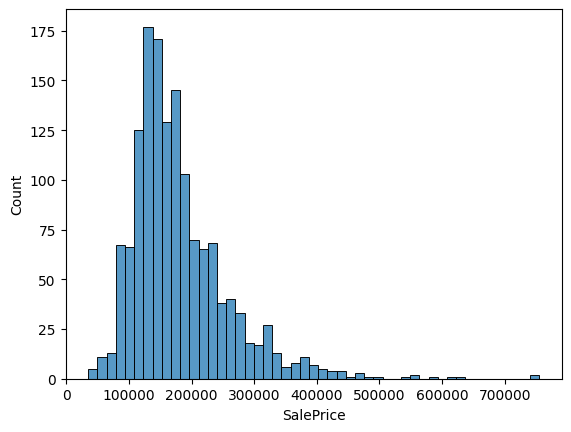

In [133]:
sns.histplot(test["SalePrice"])
;

##### Также посмотрим в логарифме

''

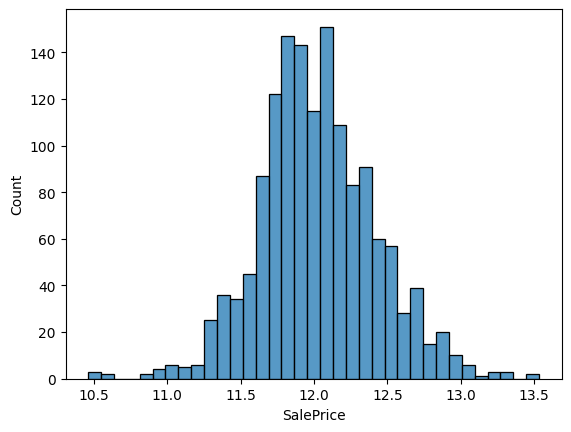

In [134]:
sns.histplot(y)
;

> **У цены хорошее распределение близкое к нормальному, отсутствуют большие выбросы. Все цены лежат в диапазоне 50к - 750к, что лежит примерно в 1 порядке.**

#### Предобработка

In [135]:
cols_with_nans

,NaN_count,data_type
LotFrontage,259,float64
Alley,1369,object
MasVnrType,872,object
MasVnrArea,8,float64
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
Electrical,1,object


##### Imputer

In [136]:
drop_features = [
    "PoolArea",
    "PoolQC",
    "Fence",
    "MiscFeature",
    "MasVnrType",
    "Alley",
]

rest_cat_features = [c for c in cat_features if c not in drop_features]
rest_num_features = [c for c in num_features if c not in drop_features]

imputer = ColumnTransformer(
    transformers=[
        ("drop_features", "drop", drop_features),
        (
            "imput_no",
            SimpleImputer(strategy="constant", fill_value="no"),
            rest_cat_features,
        ),  # type: ignore
        (
            "imput_numeric",
            SimpleImputer(strategy="median"),
            num_features,
            # [c for c in num_features if c not in drop_features],
        ),
    ],
    verbose_feature_names_out=False,
    remainder="passthrough",
)
# list(set(cat_features) - set(drop_features))
# len([c for c in cat_features if c not in drop_features])

##### Scaler

In [137]:
scaler = ColumnTransformer(
    [("scaling_num_columns", StandardScaler(), rest_num_features)],
    verbose_feature_names_out=False,
    remainder="passthrough",
)

##### Encoder

In [138]:
def float_to_int(x):
    return x.astype(int)


to_int = FunctionTransformer(float_to_int)

encoder = ColumnTransformer(
    [("encoding", make_pipeline(OrdinalEncoder(), to_int), rest_cat_features)],
    verbose_feature_names_out=False,
    remainder="passthrough",
)

##### Grouping in a preprocessor pipeline

In [139]:
preprocessor = Pipeline(
    [
        ("imputer", imputer),
        ("encoder", encoder),
        ("scaler", scaler),  # ("encoder", encoder)
    ]
)

#### Преобразуем датасет по пайплайну

In [140]:
X_preproc = preprocessor.fit_transform(X.copy())

#### Разделяем датасет на train и valid части

In [141]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_preproc, y, test_size=0.2, random_state=42
)

In [142]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,SaleType,SaleCondition,PoolArea,Id
254,0.006190,-0.212153,-0.472560,-1.350194,-0.570750,1.049169,-0.288653,-0.396727,0.585036,0.391697,...,1,1,4,4,2,5,8,4,0.0,255
1066,-0.493353,-0.268578,0.719786,0.442586,-0.570750,-0.973018,-0.288653,0.524681,-0.589275,-0.940928,...,1,2,4,4,2,4,8,4,0.0,1067
638,-0.130049,-0.174369,-2.029235,-1.689368,-0.570750,-0.973018,-0.288653,0.517889,-0.596115,-0.948691,...,3,0,5,5,1,4,8,4,0.0,639
799,-0.447940,-0.332419,-1.134975,-1.689368,0.824062,0.274948,-0.288653,-0.917424,-0.744329,-0.469981,...,2,1,4,4,2,5,8,4,0.0,800
380,-0.902070,-0.552908,-1.565545,-1.689368,-0.570750,-0.494887,-0.288653,0.545056,-0.071666,-0.353538,...,2,1,4,4,2,4,8,4,0.0,381


#### Задаем и обучаем модель

In [ ]:
# model = CatBoostRegressor(random_seed=42, cat_features=rest_cat_features)
# model.fit(X_train, y_train)

Learning rate set to 0.04196
0:	learn: 0.3801383	total: 19.3ms	remaining: 19.3s
1:	learn: 0.3698758	total: 32.6ms	remaining: 16.3s
2:	learn: 0.3596500	total: 41.1ms	remaining: 13.7s
3:	learn: 0.3504454	total: 53.3ms	remaining: 13.3s
4:	learn: 0.3417461	total: 64.2ms	remaining: 12.8s
5:	learn: 0.3343620	total: 71.5ms	remaining: 11.8s
6:	learn: 0.3267918	total: 79.1ms	remaining: 11.2s
7:	learn: 0.3192445	total: 88.2ms	remaining: 10.9s
8:	learn: 0.3115249	total: 97.2ms	remaining: 10.7s
9:	learn: 0.3037956	total: 105ms	remaining: 10.4s
10:	learn: 0.2965497	total: 114ms	remaining: 10.2s
11:	learn: 0.2901804	total: 122ms	remaining: 10.1s
12:	learn: 0.2838344	total: 130ms	remaining: 9.87s
13:	learn: 0.2778512	total: 137ms	remaining: 9.65s
14:	learn: 0.2719669	total: 145ms	remaining: 9.51s
15:	learn: 0.2663191	total: 153ms	remaining: 9.38s
16:	learn: 0.2611006	total: 159ms	remaining: 9.22s
17:	learn: 0.2558096	total: 166ms	remaining: 9.08s
18:	learn: 0.2512679	total: 173ms	remaining: 8.94s
19:

#### Проверка модели

In [ ]:
# # Для тренировочных данных
# train_pred = model.predict(X_train)
# print("MAE train:", mean_absolute_error(y_train, train_pred))
# print("MSE train:", mean_squared_error(y_train, train_pred))
# print("R2 train:", r2_score(y_train, train_pred))

# # Для валидационных данных
# valid_pred = model.predict(X_valid)
# print("MAE valid:", mean_absolute_error(y_valid, valid_pred))
# print("MSE valid:", mean_squared_error(y_valid, valid_pred))
# print("R2 valid:", r2_score(y_valid, valid_pred))

MAE train: 0.04549732366377247
MSE train: 0.003921961813587509
R2 train: 0.9742728357714399
MAE valid: 0.08769518199681724
MSE valid: 0.017963663710825466
R2 valid: 0.9037386793867592


#### Изучим признаки в датасете на предмет корреляции и важности